<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01794067-janmenc/blob/main/ibm_modulo_2_data_analysis_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **A01794067**
### **José Antonio Mendoza Castro**
### *Data Analysis with Python*

### **Ciencia y analítica de datos**

### **Dra. María de la Paz Rico**

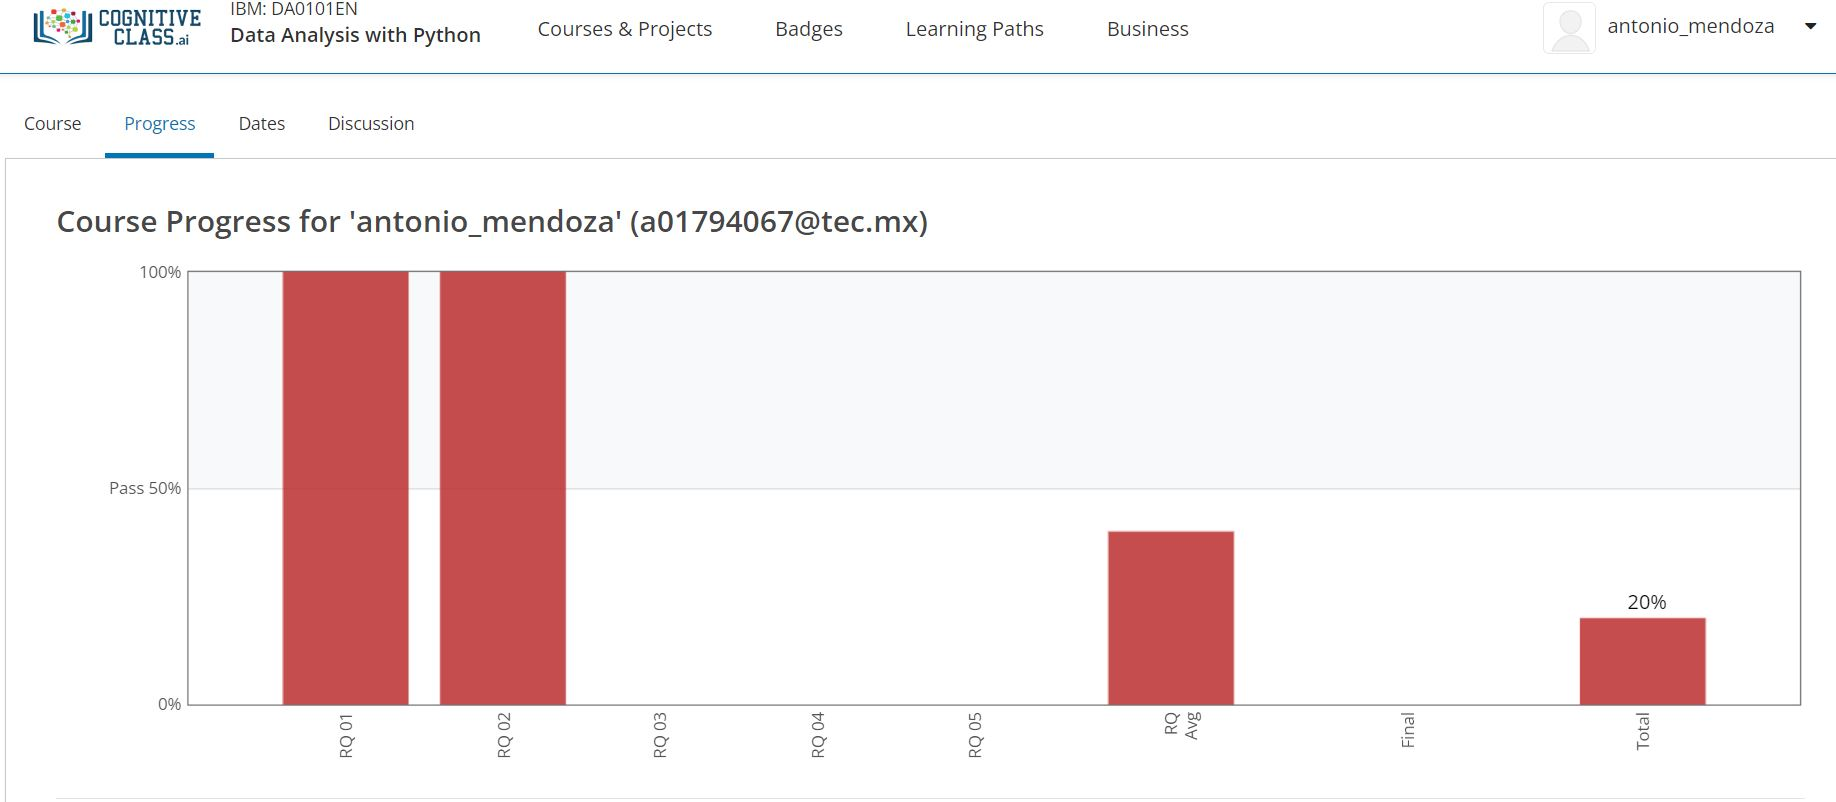

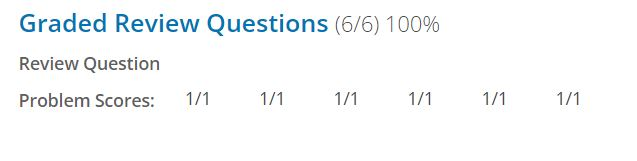

In [1]:
import pandas as pd
import numpy as np

### Pre-Procesamiento de datos en Python

El pre-procesamiento de los datos implica la limpieza y tratatamiento de los datos para su posterior análisis o modelado. Lo anterior conlleva por ejemplo identificación de *missing values*, así como su imputación, también transformación de variables cuando el rango de ellas varía enormemente.

In [2]:
#por ejemplo podríamos añadir un 1 a una variable
df = pd.DataFrame({'x': [1, 4, -1, 0, -2], 'y': [5, 9, 100, np.nan, 15]})

df['x'] = df['x'] + 1 

In [3]:
df

,x,y
0,2,5.0
1,5,9.0
2,0,100.0
3,1,NaN
4,-1,15.0


### Tratanto con *missing values* en Python

Cuando algún dato no es almacenado en un *feature* le llamamos *missing value*, una forma de tratar con estos tipos de casos es eliminar la variable, eliminar la entrada o bien remplazar el valor faltante con alguna función, por ej. con la media o la moda.

In [4]:
#por ejemplo en el df definido arriba tenemos un missing value en la variable 'y', podemos eliminar la entrada con ese dato faltante
df.dropna(subset = ['y'], axis = 0, inplace = True)

In [5]:
df

,x,y
0,2,5.0
1,5,9.0
2,0,100.0
4,-1,15.0


In [6]:
#o bien podemos imputar la media en el dato faltante
df = pd.DataFrame({'x': [1, 4, -1, 0, -2], 'y': [5, 9, 100, np.nan, 15]})

mean_y = df['y'].mean()
df['y'].replace(np.nan, mean_y, inplace = True)
df

,x,y
0,1,5.00
1,4,9.00
2,-1,100.00
3,0,32.25
4,-2,15.00


### Formato de datos en Python

El formato de los datos ayuda a que sean consistentes y fáciles de entender.

In [7]:
#por ejemplo podemos tener datos que representen el mismo valor pero escrito de manera distinta
df = pd.DataFrame({'ciudad': ['CDMX', 'CMX', 'Ciudad de México', 'CDMX', 'CMX'], 'y': [5, 9, 100, np.nan, 15]})

In [8]:
df

,ciudad,y
0,CDMX,5.0
1,CMX,9.0
2,Ciudad de México,100.0
3,CDMX,NaN
4,CMX,15.0


In [9]:
#para ello podemos homologar dichos valores
df['ciudad'] = df['ciudad'].map({'CDMX': 'CDMX', 'CMX': 'CDMX', 'Ciudad de México': 'CDMX'}) 

In [10]:
df

,ciudad,y
0,CDMX,5.0
1,CDMX,9.0
2,CDMX,100.0
3,CDMX,NaN
4,CDMX,15.0


In [11]:
#también siempre hay que verificar que tipo de datos son los que se tienen
df = pd.DataFrame({'x': [1, 4, -1, 0, -2], 'y': [5, 9, 100, np.nan, 15]}, dtype = 'unicode')

In [12]:
#en este caso habría que transformar ambas columnas a entero
df.dtypes

x    object
y    object
dtype: object

In [13]:
for col in df.columns:

  df[col] = df[col].fillna(0).astype(int) 

### Nomarlización de datos en Python

La normalización es importante cuando tenemos variables que se mueven en rangos muy distintos.

In [14]:
df = pd.DataFrame({'x': [1, 4, 8, 1, 3], 'y': [50, 91, 100, 180, 120]})

In [15]:
df

,x,y
0,1,50
1,4,91
2,8,100
3,1,180
4,3,120


In [16]:
#para evitar este tipo de diferencias en los datos existen distintas técnicas una de ellas es escalar los datos con el método Min-Max.
df['x_min_max'] = (df['x'] - df['x'].min()) / (df['x'].max() - df['x'].min())
df['y_min_max'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())

In [17]:
#con ello obtendríamos las versiones escaladas de las variables
df

,x,y,x_min_max,y_min_max
0,1,50,0.000000,0.000000
1,4,91,0.428571,0.315385
2,8,100,1.000000,0.384615
3,1,180,0.000000,1.000000
4,3,120,0.285714,0.538462


### Binning en Python

In [18]:
#es posible agrupar los datos en 'bins' para obtener una mejor exploración.
df = pd.DataFrame({'x': [11, 45, 120, 17, 30, 15, 45, 15, 67, 180, 14, 92, 14, 36, 70]})

In [19]:
df

,x
0,11
1,45
2,120
3,17
4,30
5,15
6,45
7,15
8,67
9,180


In [20]:
#para dividir nuestros datos en 'bins' podemos apoyarnos en Pandas y Numpy
bins = np.linspace(min(df['x']), max(df['x']), 4)

In [21]:
group_names = ['Low', 'Medium', 'High']

In [22]:
df['x-binned'] = pd.cut(df['x'], bins, labels = group_names, include_lowest = True)

In [23]:
df

,x,x-binned
0,11,Low
1,45,Low
2,120,Medium
3,17,Low
4,30,Low
5,15,Low
6,45,Low
7,15,Low
8,67,Low
9,180,High


### Convirtiendo variables categóricas en variables cuatitativas

In [24]:
#en el caso de tener una variable categórica se puede convertir a una variable dummy 
df = pd.DataFrame({'x': ['alto', 'bajo', 'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto']})

In [25]:
df

,x
0,alto
1,bajo
2,bajo
3,bajo
4,alto
5,bajo
6,alto
7,alto


In [26]:
pd.get_dummies(df['x'])

,alto,bajo
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,1,0
